### 1. Data Loading and Preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

In [5]:

df = pd.read_csv("ABNB.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


#### Check for Missing or Null values

In [7]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### Set Date as Datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


### 2. Data Visualization

#### Trends

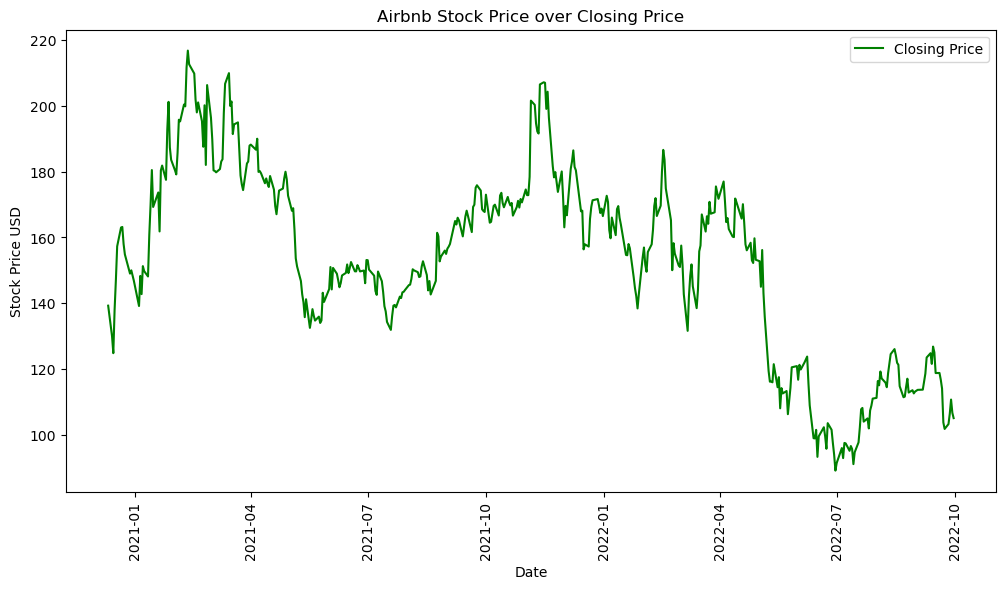

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label = 'Closing Price', color = 'green')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')
plt.title('Airbnb Stock Price over Closing Price')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

### 3. Feature Engineering

#### Extracting Date Features

In [15]:
def fetch_date(df):
    df['Year']= df.index.year
    df['Month'] = df.index.month
    df['DayoftheWeek']=df.index.dayofweek
    return df

In [16]:
df = fetch_date(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,DayoftheWeek
Date,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3


### 4. Machine Learning Model

In [18]:
X = df.drop(columns = ['Close'])
y = df['Close']
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

#### Decision Tree Regression

In [20]:
model = DecisionTreeRegressor(random_state =0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_predict)
mse = metrics.mean_squared_error(y_test,y_predict)
rsq = metrics.r2_score(y_test,y_predict)
rmse = math.sqrt(mse)
print(f'Decision Tree Regressor Metrics: MAE:{mae},MSE:{mse},RootMeanSquareError:{rmse},Rsquared{rsq}')


Decision Tree Regressor Metrics: MAE:0.3470327142857169,MSE:0.269499517831574,RootMeanSquareError:0.5191334296995079,Rsquared0.9996783892298543


#### Random Forest Regressor

In [22]:
model = RandomForestRegressor(random_state = 0)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_predict)
mse = metrics.mean_squared_error(y_test,y_predict)
rsq = metrics.r2_score(y_test,y_predict)
rmse = math.sqrt(mse)

print(f'Random Forest Regressor Metrics: MAE:{mae},MSE:{mse},RootMeanSquareError:{rmse},Rsquared{rsq}')

Random Forest Regressor Metrics: MAE:0.29589454329670223,MSE:0.2637844988276057,RootMeanSquareError:0.5135995510391396,Rsquared0.9996852093224394


In [23]:
df['Predicted_Close'] = model.predict(X)
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,DayoftheWeek,Predicted_Close
Date,,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4,139.164899
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0,130.719802
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1,125.152402
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2,136.527903
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3,146.952300
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800,2022,9,0,103.366302
2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000,2022,9,1,106.500002
2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200,2022,9,2,110.838201


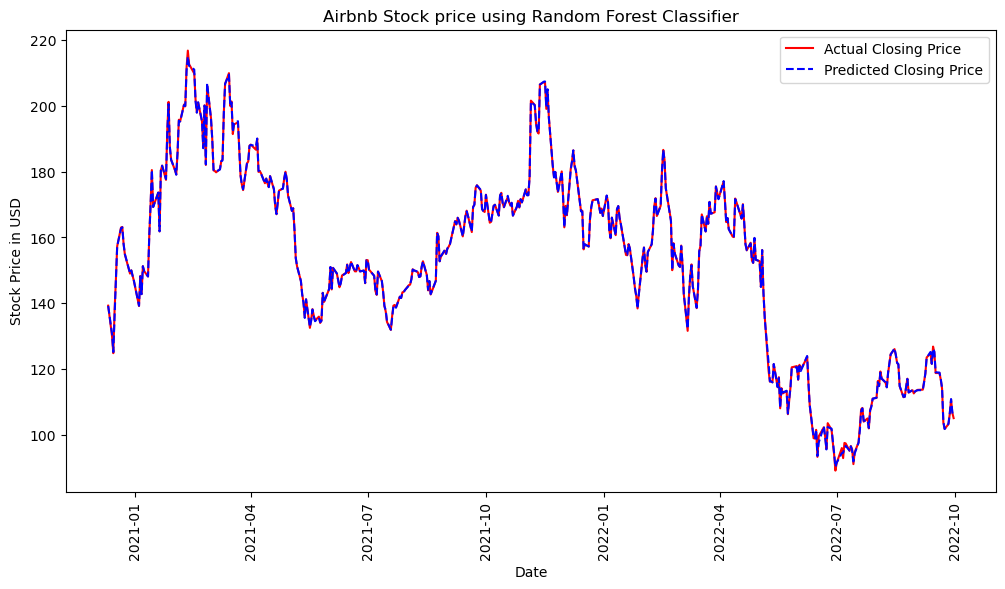

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'], label = 'Actual Closing Price',color = 'red')
plt.plot(df.index,df['Predicted_Close'], label = 'Predicted Closing Price', color = 'blue', linestyle = 'dashed')
plt.title("Airbnb Stock price using Random Forest Classifier")
plt.xlabel("Date")
plt.ylabel("Stock Price in USD")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
#### Residual Plot

In [31]:
residuals = df['Predicted_Close']- df['Close']
residuals

Date
2020-12-11   -0.085101
2020-12-14    0.719802
2020-12-15    0.352399
2020-12-16   -1.462102
2020-12-17   -0.097703
                ...   
2022-09-26    0.136299
2022-09-27    0.129999
2022-09-28    0.148199
2022-09-29    0.126999
2022-09-30    0.445000
Length: 454, dtype: float64

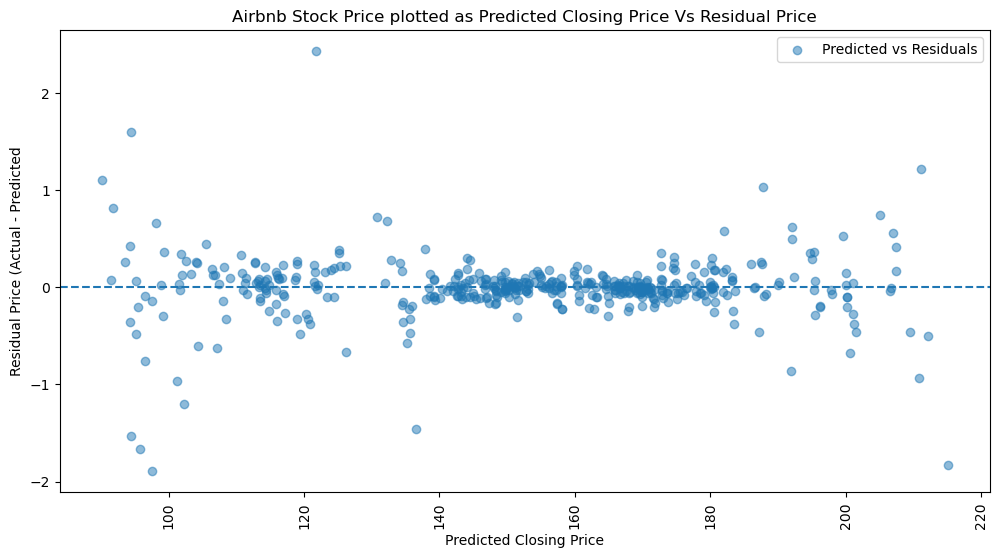

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(df['Predicted_Close'],residuals, label = 'Predicted vs Residuals', marker = 'o',alpha = 0.5)
plt.axhline(0, linestyle='dashed')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Residual Price (Actual - Predicted')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Airbnb Stock Price plotted as Predicted Closing Price Vs Residual Price')
plt.show()